In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('teleco_time_series .csv')
df.head()

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554


The model used to predict the daily revenue is SARIMAX (1,1,1) (1,1,1,183). The difference perameter of 1 was chosen because the Dickey Fuller test determined that the time series is non-stationary. One order of differencing made the series stationary. The ACF and PACF both had one significant negative spike. The training interval of .7 was chosen because this is well beyond the first season of the series and the forecast is compared to the last .3 of the total time series. 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43459D-01    |proj g|=  1.44702D-01


 This problem is unconstrained.



At iterate    5    f=  6.01371D-01    |proj g|=  5.29845D-03

At iterate   10    f=  6.01098D-01    |proj g|=  8.23261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     16      1     0     0   4.579D-06   6.011D-01
  F =  0.60109728994523204     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                      
Dep. Variable:                             Revenue   No. Observations:                  511
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 183)   Log Likelihood                -307.161
Date:                  

/Users/robertcallman/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

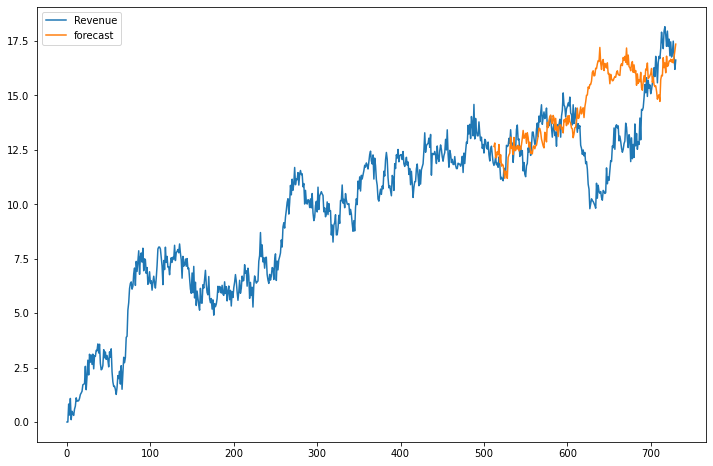

In [4]:
train = df[:int(0.7 * (len(df)))]
valid = df[int(0.7 * (len(df))):]

import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train['Revenue'], order=(1, 1, 1), seasonal_order=[1, 1, 1, 183])
results = model.fit()
print(results.summary())
df['forecast'] = results.predict(start=512, end=731, dynamic=True)
df[['Revenue', 'forecast']].plot(figsize=(12, 8))

In [10]:
pred = results.get_prediction(start=512, end=731)
print(pred.summary_frame(alpha=0.05))


Revenue       mean   mean_se  mean_ci_lower  mean_ci_upper
512      12.655962  0.635827      11.409764      13.902160
513      12.814211  0.759013      11.326572      14.301850
514      12.141720  0.837515      10.500221      13.783219
515      12.139821  0.920442      10.335788      13.943854
516      12.415462  0.991669      10.471827      14.359097
..             ...       ...            ...            ...
727      16.492953  5.891298       4.946222      28.039684
728      16.757881  5.914826       5.165035      28.350728
729      17.056347  5.938236       5.417619      28.695075
730      17.353956  5.961608       5.669419      29.038493
731      16.968030  5.984762       5.238111      28.697948

[220 rows x 4 columns]


The confidence interval tells us that about 95% of the intervals include the value of the population mean. A prediction interval is a range of values that is likely to contain the value of a new observation. For a 95% prediction interval, you can be 95% confident the next new observation will fall within this range. The prediction interval is the confidence interval for an observation and includes the error.

In [6]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(valid.Revenue, results.predict(start=512, end=731))

In [4]:
print(mae)

1.7966129452034998


Looking at the visualization of the SARIMAX forcast compared to the validation portion of the series shows that it's mostly accurate except for the unexpected dip between day 600 and 700. The MAE of 1.79 would have been better if the unexpected dip was not there. The graph shows that the prediction becomes more accurate after the dip. I would recommend that the telecom company use this model to estimate future earnings.